In [24]:
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Hannanum
from konlpy.tag import Mecab
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import re 
# 형태소 분석을 위한 객체 생성.
kkma = Kkma()
komoran = Komoran()
hannanum = Hannanum()
mecab = Mecab()
okt = Okt()

In [2]:
text1 = "안녕 나는 윤호라고해"

In [3]:
mecab.pos(text1)

[('안녕', 'IC'),
 ('나', 'NP'),
 ('는', 'JX'),
 ('윤호', 'NNP'),
 ('라고', 'VCP+EC'),
 ('해', 'VV+EC')]

In [4]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [5]:
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [6]:
train_data.groupby("label").count()

,id,document
label,,
0,75173,75170
1,74827,74825


In [7]:
print(train_data.isnull().sum())
train_data = train_data.fillna(str(0))
print(train_data.isnull().sum())

id          0
document    5
label       0
dtype: int64
id          0
document    0
label       0
dtype: int64


In [8]:
print(test_data.isnull().sum(0))
test_data = test_data.fillna(str(0))
print(test_data.isnull().sum(0))

id          0
document    3
label       0
dtype: int64
id          0
document    0
label       0
dtype: int64


In [9]:
train_data = train_data.drop('id', axis=1)

In [10]:
train_data

,document,label
0,아 더빙.. 진짜 짜증나네요 목소리,0
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...
149995,인간이 문제지.. 소는 뭔죄인가..,0
149996,평점이 너무 낮아서...,1
149997,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [11]:
test_data

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [12]:
test_data = test_data.drop('id', axis=1)

In [13]:
test_data

,document,label
0,굳 ㅋ,1
1,GDNTOPCLASSINTHECLUB,0
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [14]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

stopwords=['이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', 
'년', '가', '한', '지', '대하', '오', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나', '받', '못하', '일', '그런', '또',
'문제', '더', '사회', '많', '그리고', '크', '따르', '중', '나오', '가지', '씨', '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집',
'살', '모르', '적', '월', '데', '자신', '안', '어떤', '내', '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', 
'다른', '어떻', '여자', '개', '전', '들', '사실', '이렇', '점', '싶', '정도', '좀', '원', '통하', '놓']

c:\users\gachon\anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [15]:
train_data = train_data[:150000] 
X_train = []
for sentence in train_data['document']:
    temp_X = []
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [16]:
test_data = test_data[:50000] 
X_test = []
for sentence in test_data['document']:
    temp_X = []
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [17]:
X_train

[['아', '빙', '진짜', '짜증', '네요', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍', '구나'],
 ['너무', '재', '밓었다그래서보는것을추천한다'],
 ['교도소', '이야기', '구먼', '솔직히', '재미', '는', '다', '평점', '조정'],
 ['사이몬페그',
  '의',
  '익살',
  '스런',
  '연기',
  '돋보였',
  '던',
  '영화',
  '스파이더맨',
  '에서',
  '늙',
  '어',
  '기',
  '만',
  '했',
  '던',
  '커스틴',
  '던스트',
  '너무나',
  '도',
  '이뻐',
  '보였',
  '다'],
 ['막',
  '걸음마',
  '뗀',
  '세',
  '부터',
  '초등',
  '학교',
  '학년',
  '생',
  '인',
  '살용',
  '영화',
  'ㅋㅋㅋ',
  '별반',
  '도',
  '아까움'],
 ['원작', '의', '긴장감', '을', '제대로', '살려', '못했', '다'],
 ['별',
  '반개',
  '도',
  '아깝',
  '다',
  '욕',
  '나온다',
  '이응경',
  '길용우',
  '연기',
  '생활',
  '몇',
  '인지',
  '정말',
  '발',
  '로',
  '해도',
  '보단',
  '낫',
  '겟',
  '다',
  '납치',
  '감금',
  '만',
  '반복',
  '반복',
  '드라마',
  '는',
  '가족',
  '도',
  '다',
  '연기',
  '못',
  '는',
  '만',
  '모엿',
  '네'],
 ['액션', '는데', '도', '재미', '는', '몇', '는', '영화'],
 ['왜',
  '케',
  '평점',
  '낮',
  '은',
  '건데',
  '꽤',
  '볼',
  '만',
  '한데',
  '헐리우드',
  '식',
  '화려',
  '함',
  '에',
 

In [63]:
X_test

[['굳', 'ㅋ'],
 ['GDNTOPCLASSINTHECLUB'],
 ['뭐',
  '야',
  '평점',
  '은',
  '.',
  '...',
  '나쁘',
  '진',
  '지만',
  '10',
  '짜리',
  '는',
  '더더욱',
  '잖아'],
 ['지루',
  '는',
  '은데',
  '완전',
  '막장',
  '임',
  '.',
  '..',
  '돈',
  '고',
  '기',
  '에',
  '는',
  '.',
  '...'],
 ['3',
  'D',
  '만',
  '었',
  '어도',
  '별',
  '다섯',
  '줬',
  '을',
  '텐데',
  '.',
  '.',
  '왜',
  '3',
  'D',
  '로',
  '나와서',
  '제',
  '심기',
  '를',
  '불편',
  '게',
  '죠',
  '?',
  '?'],
 ['음악', '된', ',', '최고', '의', '음악', '영화'],
 ['진정', '쓰레기'],
 ['마치',
  '미국',
  '애니',
  '에서',
  '튀어나온',
  '듯',
  '창의',
  '력',
  '는',
  '로봇',
  '디자인',
  '부터',
  ',',
  '고개',
  '를',
  '젖',
  '게',
  '한다'],
 ['갈수록',
  '개판',
  '는',
  '중국',
  '영화',
  '유치',
  '고',
  '내용',
  '음',
  '폼',
  '잡',
  '다',
  '끝',
  '남',
  '말',
  '도',
  '는',
  '무기',
  '에',
  '유치',
  'cg',
  '남무',
  '아',
  '그립',
  '다',
  '동사서독',
  '은',
  '영화',
  '이건',
  '3',
  '류',
  '아류',
  '작',
  '다'],
 ['이별',
  '의',
  '아픔',
  '뒤',
  '에',
  '찾아오',
  '는',
  '새로운',
  '인연',
  '의',
  '기쁨',
  'But',
  ','

In [64]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [32]:
token = tokenizer.word_index

In [56]:
token=mecab.morphs(token)  

In [59]:
token=mecab.morphs(token)  

In [60]:
token

['정부',
 '가',
 '발표',
 '하',
 '는',
 '물가',
 '상',
 '승률',
 '과',
 '소비자',
 '가',
 '느끼',
 '는',
 '물가',
 '상승',
 '률',
 '은',
 '다르',
 '다']

In [66]:
word2index={}  
bow=[]  
for voca in token:  
         if voca not in word2index.keys():  
             word2index[voca]=len(word2index)  
# token을 읽으면서, word2index에 없는 (not in) 단어는 새로 추가하고, 이미 있는 단어는 넘깁니다.   
             bow.insert(len(word2index)-1,1)
# BoW 전체에 전부 기본값 1을 넣어줍니다. 단어의 개수는 최소 1개 이상이기 때문입니다.  
         else:
            index=word2index.get(voca)
# 재등장하는 단어의 인덱스를 받아옵니다.
            bow[index]=bow[index]+1
# 재등장한 단어는 해당하는 인덱스의 위치에 1을 더해줍니다. (단어의 개수를 세는 것입니다.)  
print(word2index)  

{'정부': 0, '가': 1, '발표': 2, '하': 3, '는': 4, '물가': 5, '상': 6, '승률': 7, '과': 8, '소비자': 9, '느끼': 10, '상승': 11, '률': 12, '은': 13, '다르': 14, '다': 15}


In [62]:
bow

[1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [21]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 49978
등장 빈도가 2번 이하인 희귀 단어의 수: 28419
단어 집합에서 희귀 단어의 비율: 56.86301972868062
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.8486485809761182


In [22]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)


단어 집합의 크기 : 21561


In [23]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [24]:
X_train

[[23, 850, 28, 174, 25, 639],
 [902, 426, 281, 568, 3, 85, 1489, 40, 728, 889, 319],
 [17, 151, 1],
 [7969, 114, 3912, 232, 67, 2, 4, 43, 3252],
 [1,
  7,
  8413,
  983,
  40,
  2635,
  44,
  3,
  2563,
  29,
  1059,
  26,
  30,
  15,
  31,
  44,
  15260,
  1,
  348,
  6,
  2818,
  1610,
  4],
 [566, 1, 17744, 373, 132, 1402, 598, 1521, 558, 37, 1, 3, 52, 2137, 6, 646],
 [195, 7, 305, 10, 308, 1840, 716, 4],
 [173,
  1267,
  6,
  101,
  4,
  343,
  643,
  10264,
  15261,
  40,
  1365,
  227,
  191,
  20,
  800,
  19,
  277,
  447,
  421,
  490,
  4,
  3095,
  8414,
  15,
  1323,
  1323,
  55,
  2,
  237,
  6,
  4,
  40,
  76,
  2,
  15,
  1,
  32],
 [91, 16, 6, 67, 2, 227, 2, 3],
 [48,
  513,
  43,
  184,
  8,
  644,
  475,
  63,
  15,
  424,
  1340,
  536,
  629,
  57,
  9,
  15,
  17,
  15262],
 [1],
 [63,
  357,
  2282,
  78,
  163,
  49,
  4,
  140,
  7,
  2453,
  774,
  12220,
  2,
  576,
  2564,
  2000,
  7,
  6612,
  4],
 [221, 81, 13528, 5, 1, 7547, 1, 17745, 354, 3840, 40, 113

In [25]:
X_test

[[622, 100],
 [1],
 [62, 82, 43, 8, 1, 1, 833, 266, 27, 1, 537, 2, 3332, 778],
 [70, 2, 178, 97, 282, 92, 1, 1, 109, 5, 30, 9, 2, 1, 1],
 [1,
  1,
  15,
  14,
  375,
  173,
  1941,
  452,
  10,
  486,
  1,
  1,
  48,
  1,
  1,
  19,
  529,
  254,
  1,
  12,
  727,
  11,
  231,
  1,
  1],
 [182, 8939, 116, 1, 42, 7, 182, 3],
 [517, 74],
 [977,
  370,
  516,
  29,
  12986,
  54,
  4529,
  1551,
  2,
  1491,
  4020,
  132,
  1,
  5547,
  12,
  2733,
  11,
  148],
 [467,
  1165,
  2,
  570,
  3,
  179,
  5,
  64,
  21,
  2782,
  406,
  4,
  88,
  87,
  39,
  6,
  2,
  2753,
  9,
  179,
  1,
  1,
  23,
  1274,
  4,
  16533,
  8,
  3,
  93,
  1,
  404,
  1434,
  253,
  4],
 [2797, 7, 1311, 520, 9, 10723, 2, 713, 2942, 7, 3773, 1, 1, 212, 2, 32, 1, 1],
 [141, 25, 331, 7589, 71, 1],
 [133, 1112, 7, 1080, 507, 658, 271, 45, 574, 352],
 [940,
  8,
  460,
  4,
  1525,
  8,
  4552,
  10,
  3362,
  26,
  230,
  1,
  9559,
  7,
  1525,
  10,
  41,
  14643,
  1384,
  5,
  320,
  10840,
  8,
  3590,
 

In [26]:
Y_train = np.array(train_data['label'])
Y_test = np.array(test_data['label'])

In [27]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [28]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
Y_train = np.delete(Y_train, drop_train, axis=0)
print(len(X_train))
print(len(Y_train))

148650
148650


/home/momo/anaconda3/envs/NLP_env/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


리뷰의 최대 길이 : 74
리뷰의 평균 길이 : 12.896212579885637


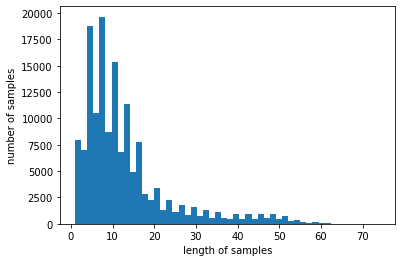

In [29]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [30]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [31]:

max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 91.69929364278507


In [32]:

X_train = pad_sequences(X_train, padding='post', maxlen = max_len)
X_test = pad_sequences(X_test, padding='post', maxlen = max_len)

In [33]:
X_train

array([[  23,  850,   28, ...,    0,    0,    0],
       [ 902,  426,  281, ...,    0,    0,    0],
       [  17,  151,    1, ...,    0,    0,    0],
       ...,
       [ 112,   62,  146, ...,    0,    0,    0],
       [ 940,    3,    7, ...,    0,    0,    0],
       [ 133,    3, 1766, ...,    0,    0,    0]], dtype=int32)

In [34]:
X_test

array([[622, 100,   0, ...,   0,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [ 62,  82,  43, ...,   0,   0,   0],
       ...,
       [919,   6,  13, ...,   0,   0,   0],
       [338, 405,   2, ...,   0,   0,   0],
       [887,   2,  48, ...,   0,   0,   0]], dtype=int32)

In [56]:
from sklearn.naive_bayes import GaussianNB
GauNB = GaussianNB()
GauNB.fit(X_train, Y_train)
GauNB_pred = GauNB.predict(X_test)

In [68]:
print("정확도:", accuracy_score(Y_test, GauNB_pred))

정확도: 0.50942


In [94]:
from sklearn.naive_bayes import BernoulliNB
BerNB = BernoulliNB()
BerNB.fit(X_train, Y_train)
BerNB_pred = BerNB.predict(X_test)

In [95]:
print("정확도:", accuracy_score(Y_test, BerNB_pred))

정확도: 0.50878


In [72]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfc = RandomForestClassifier(max_depth=20, random_state=24)

rfc.fit(X_train, Y_train)

rfc_pred = rfc.predict(X_test)

In [75]:
print("정확도:", accuracy_score(Y_test, rfc_pred))

정확도: 0.6178


In [114]:
def sentiment_predict(new_sentence):
    new_sentence = mecab.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(rfc.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [115]:
sentiment_predict('이딴게 영화냐 ㅉㅉ')

100.00% 확률로 긍정 리뷰입니다.



In [116]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ')

100.00% 확률로 긍정 리뷰입니다.



In [117]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

100.00% 확률로 긍정 리뷰입니다.



In [118]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다')

100.00% 확률로 부정 리뷰입니다.



In [119]:
sentiment_predict('와 개쩐다')

100.00% 확률로 부정 리뷰입니다.



In [120]:
sentiment_predict('이 영화 재밌다')

100.00% 확률로 부정 리뷰입니다.



# 일단 이거는 binary classifier

이거를 풀기위해서 일단은 전처리 파트를 공부를 해야해요 

각자의 데이터셋을 만들어오기! <--- 중요!

               doucment
          3D/만 /아니었어도/ 별 /다섯 /개 줬을/텐데/.. 왜 /3D/로/ 나와서 /제 /심기/를 불편/하게/ 하/죠/?/?/  이런식으로 분류되게  만들어오기
          
          
전처리 끝내놓으면 이제 모델에 넣고 하기 편해가지고 전처리 파트 공부해서 전처리 하고 다시 모이기


In [36]:
!pip install gensim